# Workflow to calculate the electronic properties - Example

This notebook provides the workflow for:

- geometry optimisation
- calculation of the DOS and band structures
- display of the electronic structure
- comparison of two structures (to be used if two systems, such as a pure material and a doped one are being studied in order to see the effect of the structural modification on the electronic structure)


In [1]:
#Import system 
import sys
sys.path.insert(1, '../../functions/') #The path to the function folder is different from the notebooks in the examle folder
sys.path.insert(1, '../')
import nbimporter
from os.path import join

#Import functions
from crystal_io import read_input
from settings import runcry
from settings import runprop
from settings import vesta
from visualisation_tools import gui2cif
from plotting import plot_bs
from plotting import plot_doss
from plotting import plot_es
from plotting import compare_bs
from plotting import compare_es

import re
import numpy as np
import pandas as pd
#import time
from ase.io.crystal import read_crystal
from ase.visualize import view
from ase.visualize.plot import plot_atoms
import matplotlib.pyplot as plt
from IPython.display import Javascript

### Setting the variables

In [2]:
#Variables used in the whole notebook
directory = '../data/es' # directory where the original input is saved
input_name = 'mgo' # name of the original input
file_path = join(directory,input_name)

#Band structure calculation
band_input_name = 'mgo_BAND'
band_file_path = join(directory,band_input_name)
bands_file_path = join(directory,band_input_name+'_dat.BAND')

#k point path
k_labels = ['G','X','L','G','W']

#Bands energy range
energy_range = [-5,+20]

#Band structure title
title_bs = 'MgO band structure' 

#DOS calculation
dos_input_name = 'mgo_DOSS'
dos_file_path = join(directory,dos_input_name)
doss_file_path = join(directory,dos_input_name+'_dat.DOSS')

#DOS labels
dos_labels = ['Mg','O','Total DOS']

#DOS plot title
title_dos = 'MgO DOS' 

#Electronic structure title
title_es = 'MgO electronic structure' 

#Compare electronic structure?
compare = True

#Please DO NOT modify the line below
if compare == True:
    Javascript("Jupyter.notebook.execute_cells([5])")

In [3]:
#Variables used when comparing two calculations (no need to fill this cell otherwise)

directory2 = '../data/es' # directory where the original input is saved
input_name2 = 'cao' # name of the original input
file_path2 = join(directory2,input_name2)

#Additional band structure
band_input_name2 = 'cao_BAND'
band_file_path2 = join(directory2,band_input_name2)
bands_file_path2 = join(directory2,band_input_name2+'_dat.BAND')

#Additional DOS
dos_input_name2 = 'cao_DOSS'
dos_file_path2 = join(directory2,dos_input_name2)
doss_file_path2 = join(directory2,dos_input_name2+'_dat.DOSS')
dos_labels2 = ['Ca','O','Total DOS']

## Optimise the structure

In [4]:
runcry(file_path)

'../data/es/mgo.out calculation successfully completed'

In [5]:
if compare == True:
    runcry(file_path2)

## Band structure calculation

In [6]:
runprop(band_file_path,file_path)

In [7]:
if compare == True:
    runprop(band_file_path2,file_path2)

## Density of States (DOS) calculation

In [8]:
runprop(dos_file_path,file_path)

In [9]:
if compare == True:
    runprop(dos_file_path2,file_path2)

## Visualise the structure

### Vesta
In order to visualise the structure through VESTA, the keword 'EXTPRT' must be included at the end of the geom_block

In [10]:
gui2cif(file_path+'.gui')
cif_file_name = file_path+'.cif'
vesta(cif_file_name)

### ASE view

In [11]:
gui_file_name = file_path+'.gui'
atoms = read_crystal(gui_file_name)
view(atoms, viewer='x3d')

### Matplotlib

<AxesSubplot:>

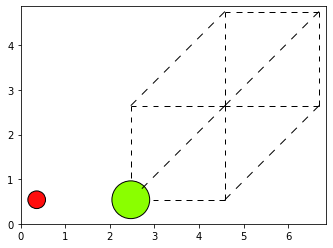

In [12]:
gui_file_name = file_path+'.gui'
atoms = read_crystal(gui_file_name)
fig, ax = plt.subplots()
plot_atoms(atoms, ax, radii=0.3, rotation=('90x,90y,90z'))

## Electronic structure

### Band structure

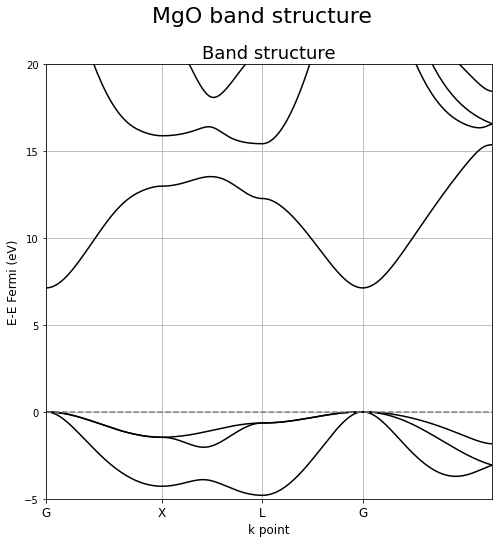

In [13]:
plot_bs(bands_file_path,k_labels,energy_range,title_bs,not_scaled=False)

### DOS

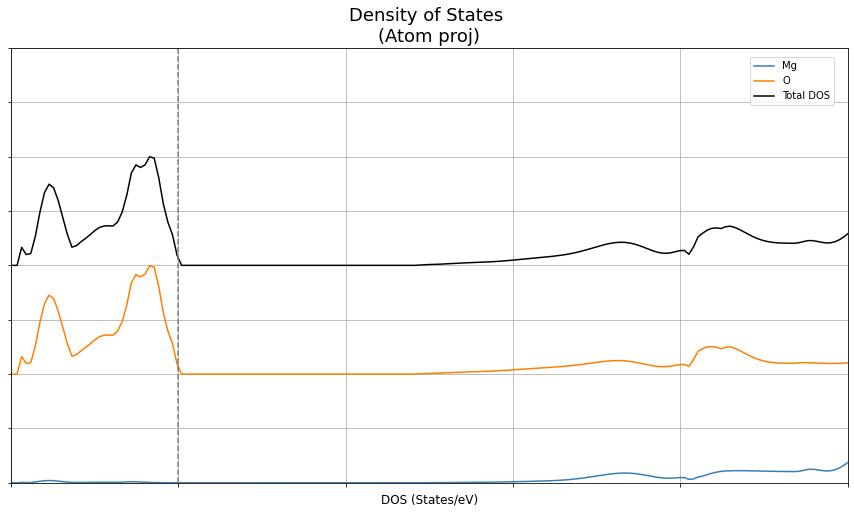

In [14]:
plot_doss(doss_file_path,energy_range,dos_labels,title=False,not_scaled=False)

### Band structure + DOS

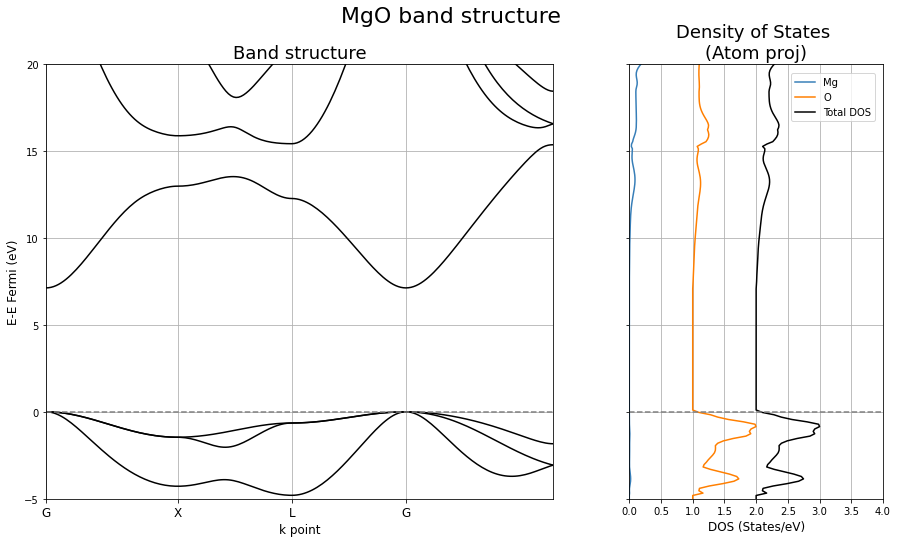

In [15]:
plot_es(bands_file_path,doss_file_path,k_labels,energy_range,dos_labels,title_bs,not_scaled=False)

### Compare band structures

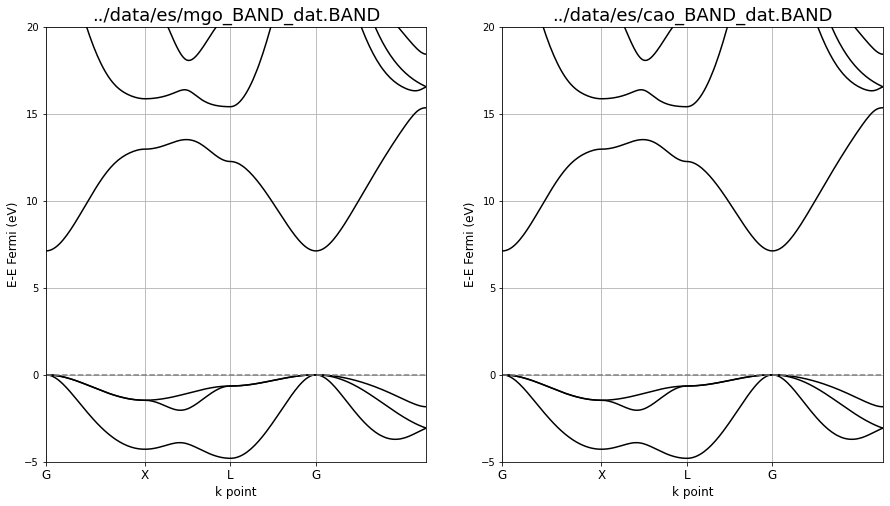

In [16]:
compare_bs(bands_file_path, bands_file_path2, k_labels, energy_range, not_scaled=False)

### Compare electronic structures

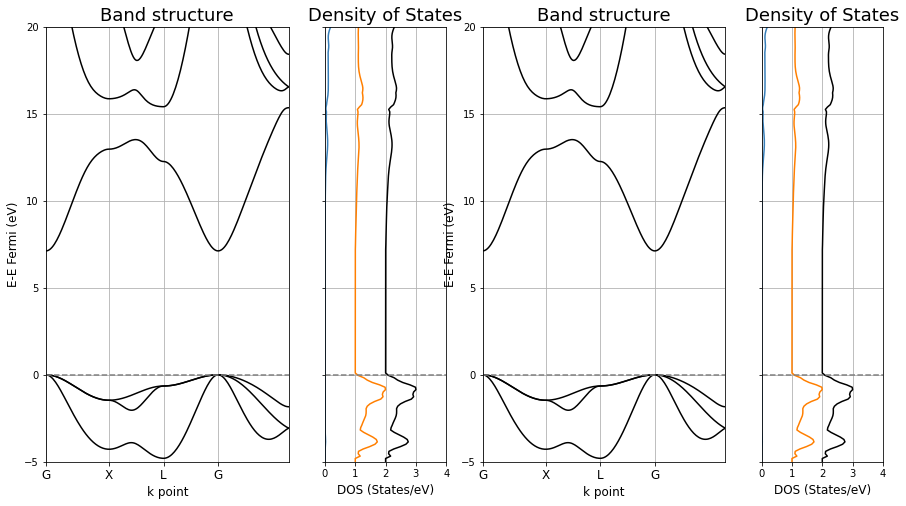

In [17]:
compare_es(bands_file_path, bands_file_path2, doss_file_path, doss_file_path2, k_labels, energy_range,not_scaled=False)